In [32]:
import numpy as np
import seaborn as sns
from scipy.stats import expon, kstest
import matplotlib.pyplot as plt
from numpy.typing import ArrayLike
from typing import Callable
sns.set_theme()
sns.set_palette("magma")


---
# Ejercicio 4
Calcular una aproximación del *p-valor* de la hipótesis: "Los siguientes 13 valores provienen de una distribución exponencial con media 50,0"
$$
86.0, \quad 133.0, \quad 75.0, \quad 22.0, \quad 11.0, \quad 144.0, \quad 78.0, \quad 122.0, \quad 8.0, \quad 146.0, \quad 33.0, \quad 41.0, \quad 99.0
$$

In [1]:
SAMPLES_OBSERVED = [
    86, 133, 75,
    22, 11, 144,
    78, 122, 8,
    146, 33, 41,
    99
]

Como una distribución exponencial es para una variable aleatoria de tipo *continua* utilizamos para rechazar o no la hipótesis el *Test de Kolmogorov-Smirnov*.

Tenemos por $H_0$ que los datos provienen de una distribución exponencial con media 50:
$$
F(x) = 1 - e^{x/50}
$$

# 🤔 Test de Kolmogorov-Smirnov

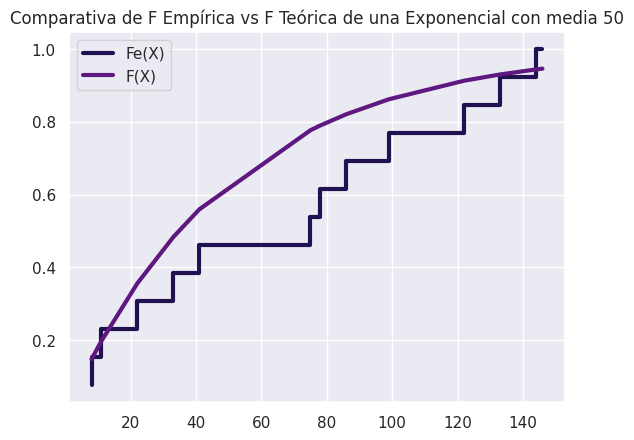

In [12]:
SAMPLES_OBSERVED_SORTED = np.sort(SAMPLES_OBSERVED)
NSAMPLES = len(SAMPLES_OBSERVED_SORTED)


empirical_data = np.arange(1, NSAMPLES + 1) / NSAMPLES

# Distribución real (Exponencial con media 50
real_data = expon.cdf(SAMPLES_OBSERVED_SORTED, scale=50)

plt.step(SAMPLES_OBSERVED_SORTED, empirical_data, label='Fe(X)', linewidth=3)
sns.lineplot(x=SAMPLES_OBSERVED_SORTED, y=real_data, label='F(X)', linewidth=3)

plt.title("Comparativa de F Empírica vs F Teórica de una Exponencial con media 50")
plt.legend()
plt.show()

In [39]:
def KS_statistic(Nsamples:int, samples: ArrayLike,
                G: Callable[[ArrayLike], ArrayLike]) -> float:
        """
        Estadistico de Kolmogorov-Smirnov para una muestra

        Args:
            samples (ArrayLike): muestras que se reciben para el estadistico
            G (Callable[[ArrayLike],ArrayLike]): función sobre la que se aplica
            el estadistico.
        
        Returns:
            (float): Resultado del estadistico.
        """
        # Distribución Uniforme Real
        G_values = G(samples)
        
        # Calculamos el estadistico
        Fe_minus = np.arange(0, Nsamples) / Nsamples
        Fe_plus = np.arange(1, Nsamples+1) / Nsamples

        # D = d
        D_plus = Fe_plus - G_values
        D_minus = G_values - Fe_minus
        d = np.max(np.concatenate([D_plus, D_minus]))
        return d

def test_Kolmogorov_Smirnov(alpha:float, samples:list[float], Nsamples:int, Nsim: int):
    """
    Test de Kolmogorov_Smirnov con H0: "las muestras del ejercicio
    son Exponenciales con media 50" y confianza de 95%.

    Args:
        Nsamples (int): numero de muestras por iteracion
        Samples (List[float]): Muestras del ejercicio
        Nsim (int): numero de simulaciones para estimar el p-valor
    """
    # Ordeno las muestras
    x_samples = np.sort(list(samples))

    # Utiliza como función F la func de distrib acumulada de la exponencial con lambda 1/50.
    d = KS_statistic(Nsamples=Nsamples, samples=x_samples, G=lambda x: expon.cdf(x, scale=50))

    print(f"🧐 D estadístico:{round(d, 4)}")

    p_value = 0
    for _ in range(Nsim):
        simulate_samples = np.sort(expon.rvs(scale=50, size=Nsamples))
        
        # Función identidad: G(u) = u
        d_sim = KS_statistic(Nsamples=Nsamples, samples=simulate_samples, G=lambda x: expon.cdf(x, scale=50))
        if d_sim >= d:
            p_value += 1
    
    p_value = p_value / Nsim
    print(f"☝️ p-valor obtenido: {round(p_value, 4)}")

    if p_value > alpha:
        print(f"😲☝️ Como {p_value} > {alpha}:")
        print("\t 😒 No hay evidencia suficiente para rechazar Ho")
    else:
        print(f"😲☝️ Como {p_value} <= {alpha}:")
        print(f"\t 🔴 Se rechaza Ho con una confianza del {int(100 * (1-alpha))}%")

In [35]:
ALPHA = 0.05
test_Kolmogorov_Smirnov(alpha=ALPHA, samples=SAMPLES_OBSERVED, Nsamples=NSAMPLES, Nsim=10_000)

🧐 D estadístico:0.3923
☝️ p-valor obtenido: 0.0248
😲☝️ Como 0.0248 <= 0.05:
	 🔴 Se rechaza Ho con una confianza del 95%


## 🐍 Implementación de Scipy

In [38]:
# Utilizando la librería de scipy
test_result = kstest(SAMPLES_OBSERVED, cdf="expon", args=(0, 50))
d = round(test_result[0], 4)
p_value = round(test_result[1], 4)

print(f"🧐 D estadístico:{d}")
print(f"☝️ p-valor obtenido: {p_value}")

if p_value > ALPHA:
    print(f"😲☝️ Como {p_value} > {ALPHA}:")
    print("\t 😒 No hay evidencia suficiente para rechazar Ho")
else:
    print(f"😲☝️ Como {p_value} <= {ALPHA}:")
    print(f"\t 🔴 Se rechaza Ho con una confianza del {int(100 * (1-ALPHA))}%")

🧐 D estadístico:0.3923
☝️ p-valor obtenido: 0.0259
😲☝️ Como 0.0259 <= 0.05:
	 🔴 Se rechaza Ho con una confianza del 95%
